# 九章 KNN 教程

k-Nearest-Neighbors (k-NN) is a supervised machine learning model. 
Supervised learning is when a model learns from data that is already labeled.

Pros:
- 数据量小，效果可以
- 算法简单，适合入门

Cons:
- memory-based learning。要把所有数据都存下来，这些数据就是它的模型，存储量大。 
- 计算量大，每个样本来了都会和已有每一条样本作欧式距离计算，算完后找对好的k个。

In [1]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
import matplotlib.pyplot as plt # 画图常用库

## Load data
- use .shape to check if all the data have been successfully loaded
- use plt.imshow to see what does data look like

In [2]:
data_dir = './input/'
train_row = 5000 # 如果想取全部数据，设置为最大值 42000
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + 'train.csv', sep=',', header=0)
    print(train.shape)
    X_train = train.values[:train_row, 1:]    #attributes特征, .values变成了 2d-ndarray [只读前train_row行:特征]
    y_train = train.values[:train_row,0]  #label  
    
    test_data = pd.read_csv(data_dir + 'test.csv', sep=',', header=0).values   # 无label，只有特征，不用slice
    return X_train, y_train, test_data

origin_X_train, origin_y_train, test_data=load_data(data_dir, train_row)


(42000, 785)


In [3]:
print(origin_X_train.shape, origin_y_train.shape,test_data.shape) 


(5000, 784) (5000,) (28000, 784)


In [4]:
# 看一眼,都是0看不明白
origin_X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

5


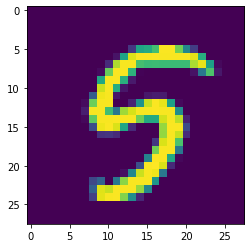

In [5]:
# 换成图像看
row=8
print(origin_y_train[row])    #看label
plt.imshow(origin_X_train[row].reshape((28,28)))   

In [6]:
origin_y_train   # 5000个


array([1, 0, 1, ..., 8, 7, 9])

In [14]:
for i,num in enumerate(origin_y_train):
    while i < 6:
        print('i = '+ str(i) + '     -> ' + str(num))
        i+=1

i = 0     -> 1
i = 1     -> 1
i = 2     -> 1
i = 3     -> 1
i = 4     -> 1
i = 5     -> 1
i = 1     -> 0
i = 2     -> 0
i = 3     -> 0
i = 4     -> 0
i = 5     -> 0
i = 2     -> 1
i = 3     -> 1
i = 4     -> 1
i = 5     -> 1
i = 3     -> 4
i = 4     -> 4
i = 5     -> 4
i = 4     -> 0
i = 5     -> 0
i = 5     -> 0


   73   84   94   97  101  104  112
  169  178  190  199  207  233  235  236  239  241  247  261  263  271
  275  278  287  294  298  302  306  312  324  341  348  353  354  355
  360  361  365  370  383  397  410  413  432  438  444  459  462  463
  465  473  474  477  479  487  488  507  513  515  523  536  545  547
  559  567  572  574  576  579  599  600  617  623  632  636  643  644
  664  669  682  719  725  731  749  758  759  769  785  794  808  812
  813  815  821  831  834  842  853  859  879  901  905  906  908  913
  926  927  940  948  953  956  960  977  981  982  994  995 1011 1012
 1018 1019 1020 1035 1054 1057 1060 1063 1077 1078 1079 1089 1090 1103
 1116 1127 1140 1147 1154 1157 1175 1176 1177 1197 1206 1210 1215 1216
 1220 1223 1225 1230 1254 1261 1275 1284 1286 1287 1298 1311 1313 1327
 1330 1331 1346 1365 1370 1379 1394 1400 1401 1408 1419 1437 1445 1454
 1470 1481 1497 1499 1518 1533 1534 1539 1545 1549 1556 1557 1562 1571
 1584 1598 1602 1604 1613 1615 1633 1634 

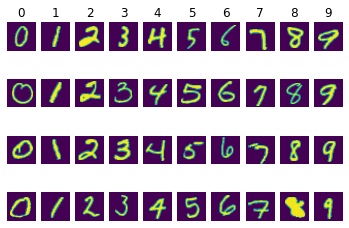

In [15]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    #0，0    1，1    2，2           
    idxs = np.nonzero([i == y for i in origin_y_train]) #返回10个tuple，每个tuple里都是非0的数字。origin_y_train是0-9labels。如果i==y, 就返回? 数字长度为1-4
    
    print(idxs[0])
    idxs = np.random.choice(idxs[0], rows)  # 10个tuple里每个选4个数字
    # print(idxs)
    """
    [2629 3801 1569 1581]      i=0
    [3797 1405 3792 2373]      i=1
    ...
    """
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1       #0*10+0+1=1   11,21,31...
        # print(plt_idx)
        plt.subplot(rows, len(classes), plt_idx)   #(4行,10列,1)  (4,10,11) ..
        plt.imshow(origin_X_train[idx].reshape((28, 28))) #  
        plt.axis("off")
        if i == 0:
            plt.title(cls)

plt.show()

    x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 0]])
    x
    x[np.nonzero(x)]
    # array([3, 4, 5, 6])

ref: https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html?highlight=nonzero#numpy.nonzero



## Split the data into train and valid data
- training data: 
把原本的训练数据拆分成为20%验证集（8400个），80%训练集（33600个）



In [16]:
from sklearn.model_selection import train_test_split

X_train,X_valid, y_train, y_valid = train_test_split(origin_X_train,
                                                   origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)
# 解释一下random 那个随机函数随机种子是什么。 随机种子一样，那么结果是一样的。
# 如果想尽量模拟随机，就不指定随机种子，每次都会变

print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


## Train KNN model
下面进行KNN模型训练 如果是大数据，需要1.5小时跑完

### 分类指标
— sklearn.metrics.accuracy_score(ytest, model.predict(x_test))
获得准确率

— sklearn.metrics.confusion_matrix(ytest, model.predict(x_test))
获得混淆矩阵

— sklearn.metrics.classification_report(ytest, model.predict(x_test))
获得分类结果详细报告


In [17]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
res_k = 0       #存最好的k
k_range = range(1,8)   #label有9类，从1-7里选
scores=[]

"""
每次把最好的结果存在res_k
每次通过枚举的k训练好一个模型
训练好的模型去验证，得到一个分数
最好的分数对应最好的k
"""
for k in k_range:
    print("k = " + str(k) + " train start: ")
    start = time.time()

    """
    建立KNN模型
    """
    knn=KNeighborsClassifier(n_neighbors=k)    #sklearn里直接调. create KNN classifier
    knn.fit(X_train,y_train) # Fit the classifier to the data

    """
    testing the model，对比 y_pred和y_valid 的各项指标
    """
    y_pred=knn.predict(X_valid)   
    accuracy = accuracy_score(y_valid,y_pred) 
    scores.append(accuracy)
    end = time.time()
    print("Complete time: " + str(end-start) + " Secs.")
    print(accuracy)  
    print(classification_report(y_valid,y_pred)) 
    print(confusion_matrix(y_valid,y_pred)) 
    


k = 1 train start: 
Complete time: 10.20741891860962 Secs.
0.919
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.90      0.98      0.94       100
           2       0.97      0.88      0.92       104
           3       0.89      0.93      0.91       100
           4       0.93      0.93      0.93       107
           5       0.95      0.88      0.92        94
           6       0.93      0.97      0.95        93
           7       0.92      0.94      0.93       116
           8       0.89      0.85      0.87        85
           9       0.85      0.85      0.85        98

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  

In [18]:
scores

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]

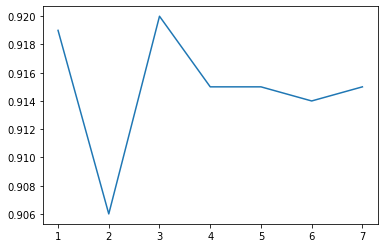

In [19]:
plt.plot(range(1,8),scores)

In [20]:
res_k=3

In [21]:
"""
使用KNN模型测试
"""
knn=KNeighborsClassifier(n_neighbors=res_k)    #sklearn里直接调
knn.fit(X_train,y_train)
#show first 100 model predictions on the test_data
y_pred=knn.predict(test_data[:100])   # replace valid data to test_data
# change this line to y_pred=knn.predict(test_data) for full test

In [22]:
y_pred

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1,
       1, 5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9,
       8, 7, 8, 2, 6, 1, 6, 8, 8, 3, 8, 2, 1, 2, 1, 0, 4, 1, 7, 0, 0, 0,
       1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3,
       6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4])

7


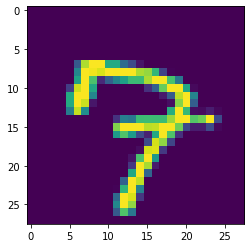

In [23]:
row=5
print(y_pred[row])
plt.imshow(test_data[row].reshape((28,28)))      #把矩阵画成图像
plt.show()              #显示图画

In [24]:
# save submission to csv
pd.DataFrame({"ImageId": list(range(1,len(y_pred)+1)),"Label": y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)

## Reference:
- https://www.kaggle.com/c/digit-recognizer
- http://yann.lecun.com/exdb/mnist/
- https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

